In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import plotly.graph_objects as go

import sklearn.datasets
import sklearn.cluster
import sklearn.linear_model

In [4]:
diabetes = sklearn.datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
x = diabetes.data
y = diabetes.target

#printing array size of x and y
print(x.shape)
print(y.shape)


(442, 10)
(442,)


In [22]:
#Creating a data frame for x
df1= pd.DataFrame(x,columns=["age","sex","bmi","bp","tc","ldl","hdl","tch","ltg","glu"])
print(df1)



          age       sex       bmi        bp        tc       ldl       hdl  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

          tch       ltg       glu  
0   -0.002592  0.019908 -0.017646  
1  

In [23]:
#Creating Data Frame for y
df2=pd.DataFrame(y,columns=["disease_progress"])
print(df2)

     disease_progress
0               151.0
1                75.0
2               141.0
3               206.0
4               135.0
..                ...
437             178.0
438             104.0
439             132.0
440             220.0
441              57.0

[442 rows x 1 columns]


In [24]:
#Combining df1 & df2 by merging
df=pd.merge(df1,df2,left_index=True,right_index=True)
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,disease_progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


Text(0, 0.5, 'glu')

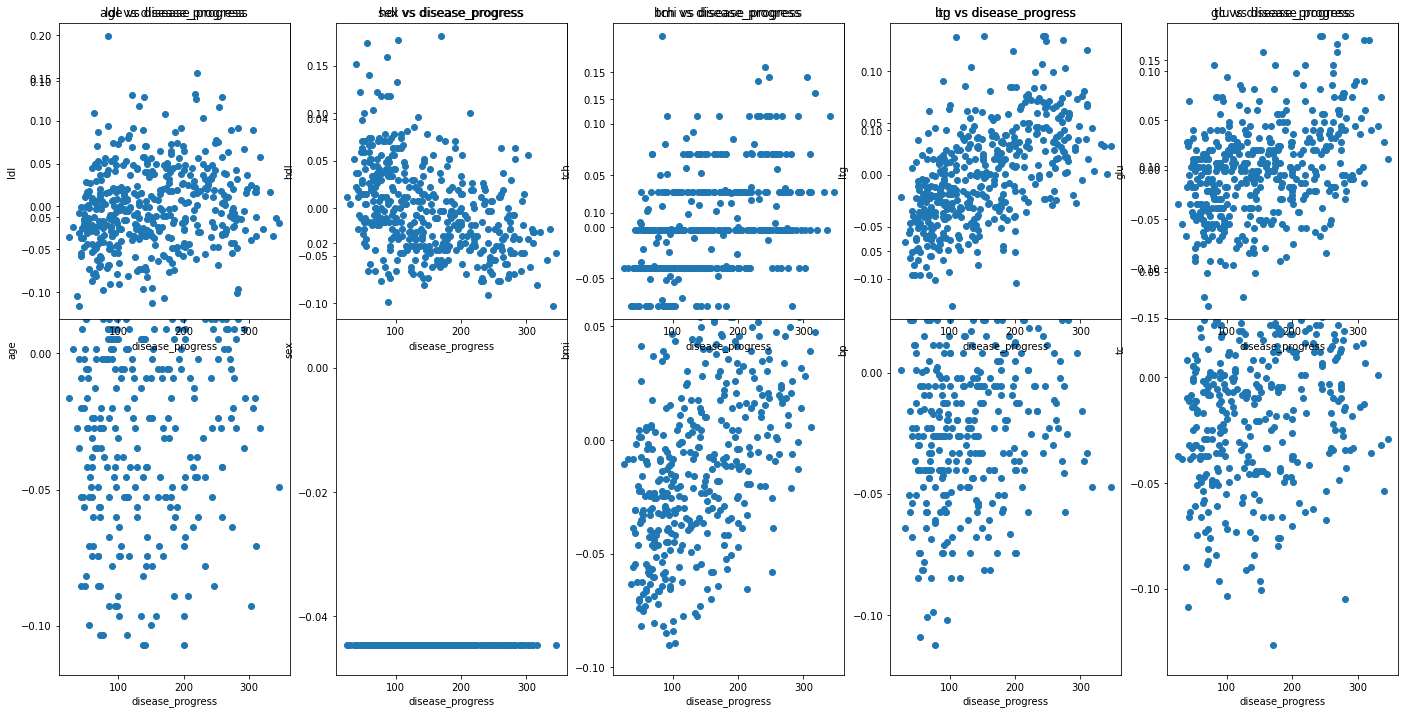

In [46]:
#Plotting scatter plots between y and variables x
fig=plt.figure(figsize=(24,12))
ax1=fig.add_subplot(151)
ax2=fig.add_subplot(152)
ax3=fig.add_subplot(153)
ax4=fig.add_subplot(154)
ax5=fig.add_subplot(155)
ax6=fig.add_subplot(251)
ax7=fig.add_subplot(252)
ax8=fig.add_subplot(253)
ax9=fig.add_subplot(254)
ax10=fig.add_subplot(255)

ax1.scatter(df["disease_progress"],df["age"])
ax2.scatter(df["disease_progress"],df["sex"])
ax3.scatter(df["disease_progress"],df["bmi"])
ax4.scatter(df["disease_progress"],df["bp"])
ax5.scatter(df["disease_progress"],df["tc"])
ax6.scatter(df["disease_progress"],df["ldl"])
ax7.scatter(df["disease_progress"],df["hdl"])
ax8.scatter(df["disease_progress"],df["tch"])
ax9.scatter(df["disease_progress"],df["ltg"])
ax10.scatter(df["disease_progress"],df["glu"])

#adding title to the plot
ax1.set_title('age vs disease_progress')
ax1.set_xlabel('disease_progress')
ax1.set_ylabel('age')

ax2.set_title('sex vs disease_progress')
ax2.set_xlabel('disease_progress')
ax2.set_ylabel('sex')

ax3.set_title('bmi vs disease_progress')
ax3.set_xlabel('disease_progress')
ax3.set_ylabel('bmi')

ax4.set_title('bp vs disease_progress')
ax4.set_xlabel('disease_progress')
ax4.set_ylabel('bp')

ax5.set_title('tc vs disease_progress')
ax5.set_xlabel('disease_progress')
ax5.set_ylabel('tc')

ax6.set_title('ldl vs disease_progress')
ax6.set_xlabel('disease_progress')
ax6.set_ylabel('ldl')

ax7.set_title('hdl vs disease_progress')
ax7.set_xlabel('disease_progress')
ax7.set_ylabel('hdl')

ax8.set_title('tch vs disease_progress')
ax8.set_xlabel('disease_progress')
ax8.set_ylabel('tch')

ax9.set_title('ltg vs disease_progress')
ax9.set_xlabel('disease_progress')
ax9.set_ylabel('ltg')

ax10.set_title('glu vs disease_progress')
ax10.set_xlabel('disease_progress')
ax10.set_ylabel('glu')

In [62]:
#finding correlation co-efficient between x and y using for loop
str=['age','sex','bmi','bp','tc','ldl','hdl','tch','ltg','glu']
for i in str:
    print( 'The correlation co-efficient between Y and',i,'is:')
    print(df2["disease_progress"].corr(df1[i]))




The correlation co-efficient between Y and age is:
0.1878887507189198
The correlation co-efficient between Y and sex is:
0.0430619984516054
The correlation co-efficient between Y and bmi is:
0.5864501344746891
The correlation co-efficient between Y and bp is:
0.4414838489308862
The correlation co-efficient between Y and tc is:
0.21202248101455076
The correlation co-efficient between Y and ldl is:
0.17405358696874249
The correlation co-efficient between Y and hdl is:
-0.39478925067091847
The correlation co-efficient between Y and tch is:
0.4304528847447734
The correlation co-efficient between Y and ltg is:
0.5658834252428094
The correlation co-efficient between Y and glu is:
0.3824834842485812


In [73]:
#bmi,ltg,bp and tch has better correlation with y compared to other x features
#creating a new dataFrame with the the above 5 x features

df_5x= df[['bmi','ltg','bp','tch','disease_progress']].copy()
print(df_5x)

          bmi       ltg        bp       tch  disease_progress
0    0.061696  0.019908  0.021872 -0.002592             151.0
1   -0.051474 -0.068330 -0.026328 -0.039493              75.0
2    0.044451  0.002864 -0.005671 -0.002592             141.0
3   -0.011595  0.022692 -0.036656  0.034309             206.0
4   -0.036385 -0.031991  0.021872 -0.002592             135.0
..        ...       ...       ...       ...               ...
437  0.019662  0.031193  0.059744 -0.002592             178.0
438 -0.015906 -0.018118 -0.067642  0.034309             104.0
439 -0.015906 -0.046879  0.017282 -0.011080             132.0
440  0.039062  0.044528  0.001215  0.026560             220.0
441 -0.073030 -0.004220 -0.081414 -0.039493              57.0

[442 rows x 5 columns]


In [77]:
#defining new x and y variables using df_5x data frame
y1=df_5x['disease_progress']
x1=df_5x.drop(['disease_progress'],axis=1)
print(x1)
print(y1)

          bmi       ltg        bp       tch
0    0.061696  0.019908  0.021872 -0.002592
1   -0.051474 -0.068330 -0.026328 -0.039493
2    0.044451  0.002864 -0.005671 -0.002592
3   -0.011595  0.022692 -0.036656  0.034309
4   -0.036385 -0.031991  0.021872 -0.002592
..        ...       ...       ...       ...
437  0.019662  0.031193  0.059744 -0.002592
438 -0.015906 -0.018118 -0.067642  0.034309
439 -0.015906 -0.046879  0.017282 -0.011080
440  0.039062  0.044528  0.001215  0.026560
441 -0.073030 -0.004220 -0.081414 -0.039493

[442 rows x 4 columns]
0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: disease_progress, Length: 442, dtype: float64


In [82]:
#Splitting data to train the model and to test the model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x1, y1, test_size=0.2, random_state=42)

#printing the shape of x-tain,x-test,y-train and y-test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(353, 4)
(353,)
(89, 4)
(89,)


In [83]:
#choosing and train the model
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
print(model.score (x_train, y_train))

0.48495904928998645


In [84]:
# Evaluate the model

# You need to evaluate your model, so look at
# what it will predict for the outcome variable
y_pred = model.predict(x_test)

## Below are the Coefficients & intercepts of the Regression Equation as calculated by the model.

In [91]:
# print the model co-efficients and Intercept
print('Intercept = %.2f' % model.intercept_)
coeff = pd.Series(model.coef_, index = x_train.columns)
print('Model coefficients =', coeff)

Intercept = 151.72
Model coefficients = bmi    631.958039
ltg    442.725582
bp     290.344305
tch     90.463781
dtype: float64


In [88]:
# print the MSE of the predictions relative to 
# the true y values of the data
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))

MSE = 2900.29
R^2 = 0.45


### The regression Equation would be :

#### Diabetes Progression = Intercept + coeff(1) X bmi + coeff(2) X ltg + coeff(3) X bp + coeff(4) X tch
#### disease_progress = 151.72 + 631.958 X bmi + 442.725 X ltg + 290.344 X bp + 90.463 X tch

In [101]:
#Repeat the linear regression steps, only now use all 10 features at once when doing your model fit

#independent variables / explanatory variables
x = df.drop(labels='disease_progress', axis=1)  #axis=1 means we drop data by column.

#dependent variable / response / target variable.
y = df['disease_progress']


#Splitting data to train the model and to test the model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

#printing the shape of x-tain,x-test,y-train and y-test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(353, 10)
(353,)
(89, 10)
(89,)


In [93]:
#choosing and train the model
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
print(model.score (x_train, y_train))

0.5279198995709652


In [99]:
# Evaluate the model

# You need to evaluate your model, so look at
# what it will predict for the outcome variable
y_pred = model.predict(x_test)

In [100]:
# print the model co-efficients and Intercept
print('Intercept = %.2f' % model.intercept_)
coeff = pd.Series(model.coef_, index = x_train.columns)
print('Model coefficients =', coeff)

Intercept = 151.35
Model coefficients = age     37.900314
sex   -241.966248
bmi    542.425753
bp     347.708305
tc    -931.461261
ldl    518.044055
hdl    163.403535
tch    275.310038
ltg    736.189098
glu     48.671125
dtype: float64


In [102]:
# print the MSE of the predictions relative to 
# the true y values of the data
from sklearn.metrics import mean_squared_error, r2_score
print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))

MSE = 2900.17
R^2 = 0.45


## The regression Equation would be :

### Diabetes Progression = Intercept + coeff(1) X age + coeff(2) X sex +.....+ coeff(10) X s6

In [103]:
from sklearn import metrics as mt

In [104]:
print("1) The model explains,", np.round(mt.explained_variance_score(y_test,y_pred)*100,2),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(y_test,y_pred),2))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(y_test,y_pred),2))

1) The model explains, 45.55 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 42.79
3) The R-Square score of the model is  0.45


### R-Square score is same for both models where 10 feautures of x and 4 feautures of x involved